In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [35]:
zero_one_colourmap = ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 7
np.random.seed(800)

# Generate Data

In [36]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

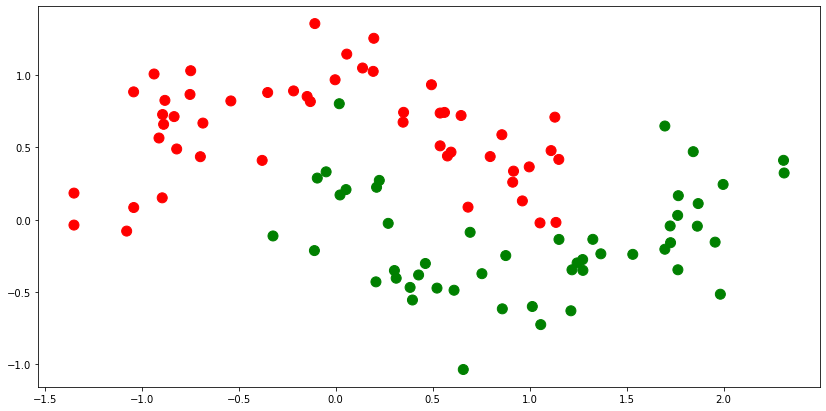

In [37]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Overfit Model

In [39]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=4000, verbose=0)

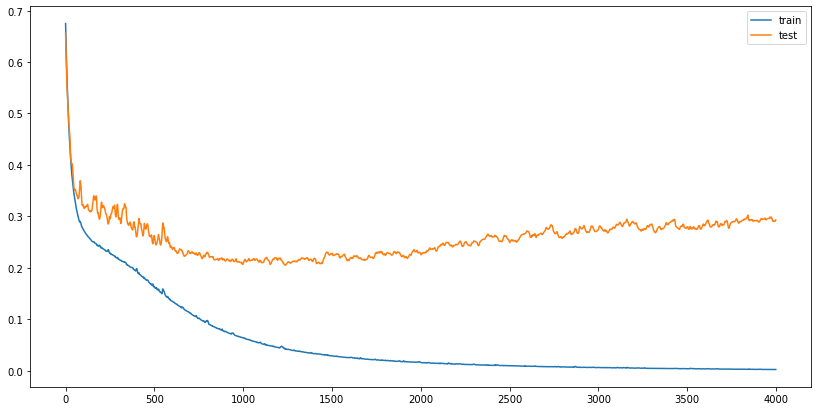

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

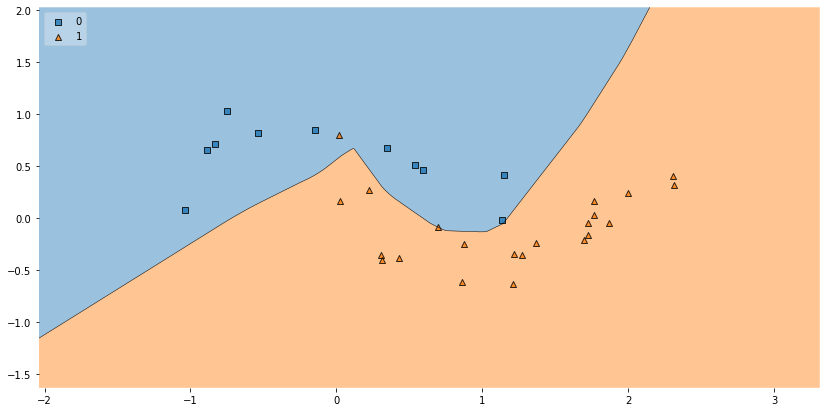

In [42]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping Model

In [43]:
reg_model = Sequential()
reg_model.add(Dense(128, input_dim=2, activation='relu'))
reg_model.add(Dense(1, activation='sigmoid'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [44]:
reg_history = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=4000, 
                            callbacks=EarlyStopping(monitor='val_loss'))

Epoch 1/4000
3/3 [==============================] - 0s 43ms/step - loss: 0.7113 - accuracy: 0.3433 - val_loss: 0.7145 - val_accuracy: 0.3333
Epoch 2/4000
3/3 [==============================] - 0s 19ms/step - loss: 0.6945 - accuracy: 0.4776 - val_loss: 0.6979 - val_accuracy: 0.4242
Epoch 3/4000
3/3 [==============================] - 0s 14ms/step - loss: 0.6797 - accuracy: 0.6866 - val_loss: 0.6866 - val_accuracy: 0.4848
Epoch 4/4000
3/3 [==============================] - 0s 16ms/step - loss: 0.6660 - accuracy: 0.7612 - val_loss: 0.6740 - val_accuracy: 0.6970
Epoch 5/4000
3/3 [==============================] - 0s 14ms/step - loss: 0.6525 - accuracy: 0.8806 - val_loss: 0.6631 - val_accuracy: 0.7273
Epoch 6/4000
3/3 [==============================] - 0s 15ms/step - loss: 0.6394 - accuracy: 0.8657 - val_loss: 0.6521 - val_accuracy: 0.7576
Epoch 7/4000
3/3 [==============================] - 0s 15ms/step - loss: 0.6275 - accuracy: 0.8806 - val_loss: 0.6421 - val_accuracy: 0.7879
Epoch 8/4000


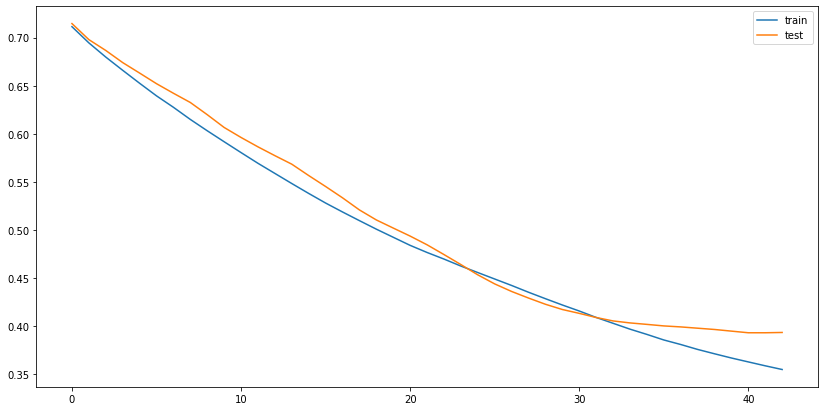

In [45]:
plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.show()

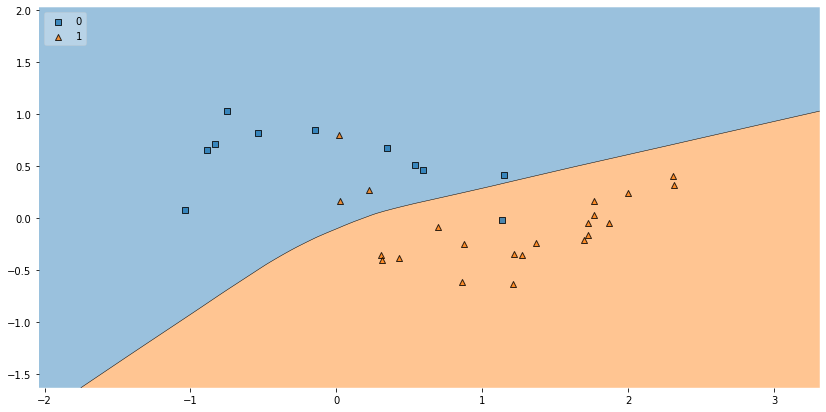

In [46]:
plot_decision_regions(X_test, y_test.ravel(), clf = reg_model, legend=2)
plt.show()